In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

**padding function**

In [4]:
def padding(image):
    padded_image = np.zeros((image.shape[0]+2,image.shape[1]+2))
    padded_image[1:image.shape[0]+1,1:image.shape[1]+1]=image 
    return padded_image

**Averaging**

In [5]:
def average_filter(image_data,filter_size):
    filter = np.ones((filter_size,filter_size))/(filter_size)**2
    padded = padding(image_data)
    new_img = np.zeros((image_data.shape[0],image_data.shape[1]))
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            new_img[i][j] = np.sum((padded[i:i+filter_size,j:j+filter_size]*filter))
    return new_img

**median Filter**

In [6]:
def median_filter(image_data,filter_size):
    padded = padding(image_data)
    new_img = np.zeros((image_data.shape[0],image_data.shape[1]))
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            new_img[i][j] = np.median(padded[i:i+filter_size,j:j+filter_size])
    return new_img

**gaussian Filter**

In [10]:
img = cv2.imread('./images/Lenna_(test_image).png',cv2.IMREAD_GRAYSCALE)

In [41]:
def low_high_pass(image,selection,mask_size):
    x = 256-mask_size
    y = 256+mask_size
    img_fou = np.fft.fft2(image)
    img_fou = np.fft.fftshift(img_fou)
    if selection == "high":
        mask = np.ones((512,512))
        mask[x:y,x:y] = 0
    elif selection == "low":
        mask = np.zeros((512,512))
        mask[x:y,x:y] = 1
    new_fou = mask*img_fou
    new_fou = np.fft.ifftshift(new_fou)
    new_fou = np.fft.ifft2(new_fou)
    return np.abs(new_fou)

**High Pass**

In [8]:
def high_filter(image_data,filter_size=3):
    filter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])/9
    padded = padding(image_data)
    new_img = np.zeros((image_data.shape[0],image_data.shape[1]))
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            new_img[i][j] = np.sum((padded[i:i+filter_size,j:j+filter_size]*filter))
    return new_img

**Gray Scale**

In [35]:
def rgb2gray(image):
    new_image = 0.299*image[:,:,0]+0.587*image[:,:,1]+0.114*image[:,:,2]
    return new_image

**Hybrid**

In [56]:
def hybrid(image1,image2):
    """image1: high filter image
    image2: low pass image"""
    image1 = rgb2gray(image1)
    image2 = rgb2gray(image2)
    image1 = high_filter(image1)
    image2 = average_filter(image2)
    new_image = image1+image2
    return new_image

In [49]:
def rgb_histogram(image):
    r = image[:,:,0]
    g = image[:,:,1]
    b = image[:,:,2]
    plt.hist(r.ravel(),256,[0,256],color='r')
    plt.hist(g.ravel(),256,[0,256],color='g')
    plt.hist(b.ravel(),256,[0,256],color='b')
    plt.show()

In [60]:
img = cv2.imread('./images/Tiger.jpg')

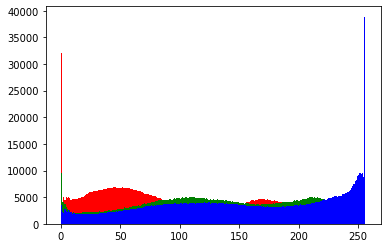

In [61]:
# img1 = rgb2gray(img)
img = rgb_histogram(img)
# img1 = np.array(img1,dtype='uint8')